<a href="https://colab.research.google.com/github/timayez/UCDPA_Ayomide/blob/main/predict%20term%20deposit%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

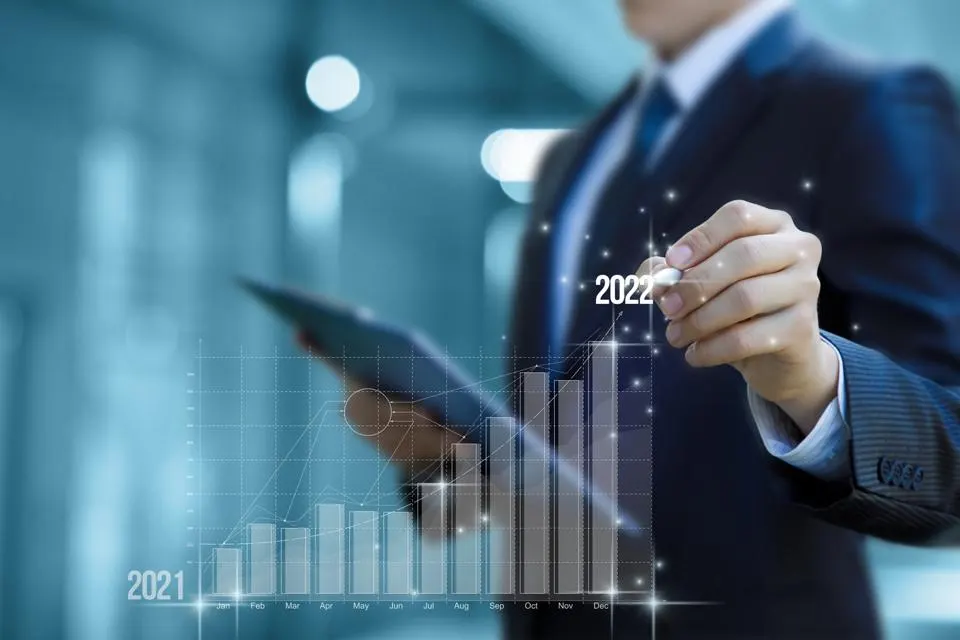

Always go back to the kaggle website to understand each step of data


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import requests

Importing data from local system and printing first 5 rows.

In [97]:
predic_f= pd.read_csv('/content/Bank predictions_Data.csv.zip') 
predic_f.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [98]:
#from google.colab import drive
#drive.mount('/content/drive')

In [99]:
predic_f.tail()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [100]:
predic_f.shape
# This shows the number of rows and column in our data (45211 and 18) respectively

(45211, 18)

Exploratory analysis

In [101]:
predic_f.info ()
# Looking at data;
# age: 9 missing value 
# balance: 3 missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


1.1 Data cleaning 

In [102]:
predic_f.isnull().sum() 
# this code returns the number of null-values in each column, age and balance: 9 and 3 respectively

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [103]:
#Replacing missing age row with the column mean (ref: W3)
age_replace = predic_f["age"].mean() # calculating the mean of "age" column, and assinging to variable "age_replace"
predic_f["age"].fillna(age_replace, inplace= True) # replacing the empty rows in age column with variable "age_replace"

In [104]:
predic_f.isnull().sum() # Now all null values in 'age' has been removed as shown bellow 

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [105]:
# remove null values left in balance
predic_f.dropna(subset=['balance'], inplace=True) #sebest balance specify where python should look for null value

In [106]:
#lets check null value again
predic_f.isnull().sum() # now empty rows are all dealt with

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Summary statistics: Gives us a quick overview of data 

In [107]:
predic_f.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,23607.499535,40.954292,1362.346620,15.807136,258.169483,2.763958,40.200562,0.580362
std,13050.570626,11.538095,3044.852387,8.322287,257.532086,3.098090,100.131506,2.303513
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12305.750000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23607.500000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34909.250000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [108]:
# reseting index
predic_f.reset_index(drop=True)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45204,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45205,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45206,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [109]:
duplicate = predic_f.duplicated().value_counts() #counting how many duplicate values do we have
print(duplicate) 

False    45208
dtype: int64


In [173]:
#sorting by age
predic_f.sort_values(by=['age'], inplace=True)
predic_f

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45205,46206,18.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
43637,44638,18.0,student,single,unknown,no,348.0,no,no,cellular,5,may,443,4,-1,0,unknown,yes
41252,42253,18.0,student,single,secondary,no,5.0,no,no,cellular,24,aug,143,2,-1,0,unknown,no
41487,42488,18.0,student,single,unknown,no,108.0,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
42146,43147,18.0,student,single,secondary,no,156.0,no,no,cellular,4,nov,298,2,82,4,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,45263,93.0,retired,married,unknown,no,775.0,no,no,cellular,22,jul,860,2,177,7,success,yes
44420,45421,93.0,retired,married,unknown,no,775.0,no,no,cellular,4,aug,476,2,13,9,success,yes
31233,32234,94.0,retired,divorced,secondary,no,1234.0,no,no,cellular,3,mar,212,1,-1,0,unknown,no
33699,34700,95.0,retired,divorced,primary,no,2282.0,no,no,telephone,21,apr,207,17,-1,0,unknown,yes


Text(0, 0.5, 'Balance')

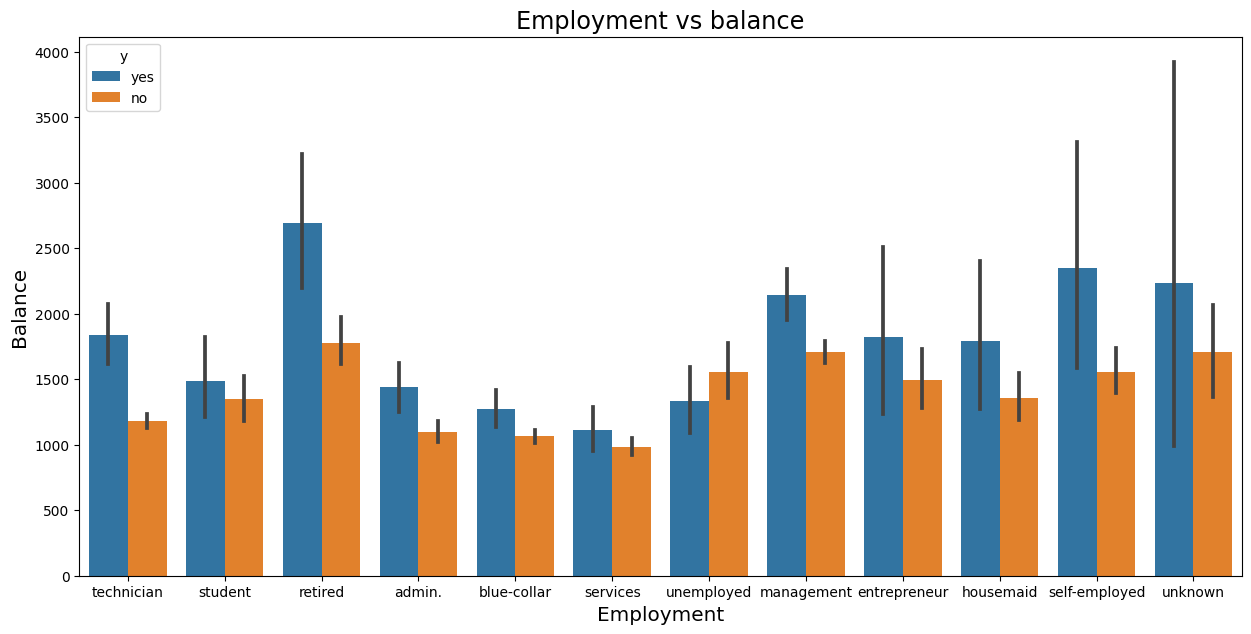

In [174]:
#Trial
plt.figure(figsize=(15,7))
sns.barplot(data=predic_f, x='job', y='balance', hue='y')

plt.title("Employment vs balance", size="xx-large")
plt.xlabel("Employment" ,size="x-large")
plt.ylabel("Balance" ,size="x-large")

In [111]:
#exploring dataframe to spot incorrect/ insequensial entry in our numerical variables
#code by AHMEDOV , A. (2022)
numerical_data = predic_f.select_dtypes(include="number") # assign numerical columns to varialble 'numerical_data' 
numerical_data


,Id,age,balance,day,duration,campaign,pdays,previous
45205,46206,-1.0,505.0,17,386,2,-1,0
45203,46204,-1.0,113.0,17,266,1,-1,0
45204,46205,-1.0,2850.0,17,300,1,40,8
40887,41888,18.0,608.0,12,267,1,-1,0
41222,42223,18.0,35.0,21,104,2,-1,0
...,...,...,...,...,...,...,...,...
44420,45421,93.0,775.0,4,476,2,13,9
31233,32234,94.0,1234.0,3,212,1,-1,0
33699,34700,95.0,2282.0,21,207,17,-1,0
41663,42664,95.0,0.0,1,215,1,-1,0


I sorted the dataframe first in decsending order so i can veiw the lowest and highest values of age on '.head()' and ".tail()" respectively. This will help me to spot potential wrong entries. For example -1 and 999 are impossible ages so we can assume they are wrong.

Using probability plot to clean data

code summary: plot compare the quantiles of the 'numerical columns' of the dataset to the quantiles of a 'normal distribution'

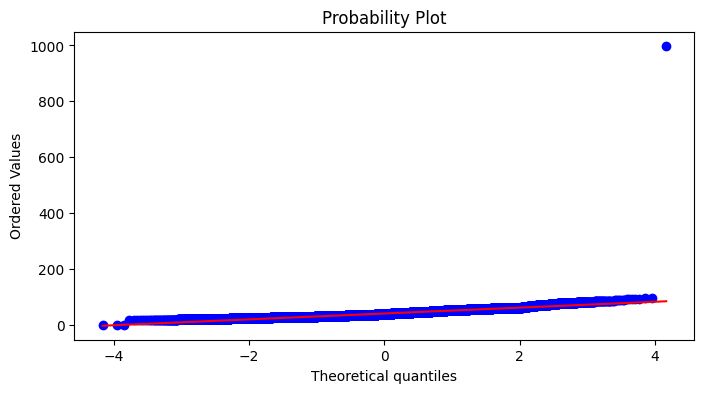

In [112]:
# Creating probability plot for 'age' (using pyplot module of the matplotlib)
#code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (8, 4) # This set the size of the graph width and height respectively
stats.probplot(predic_f["age"], dist="norm", plot=plt) 
plt.show()
#code summary: plot compare the quantiles of the 'age column' of the dataset to the quantiles of a 'normal distribution'

<Axes: >

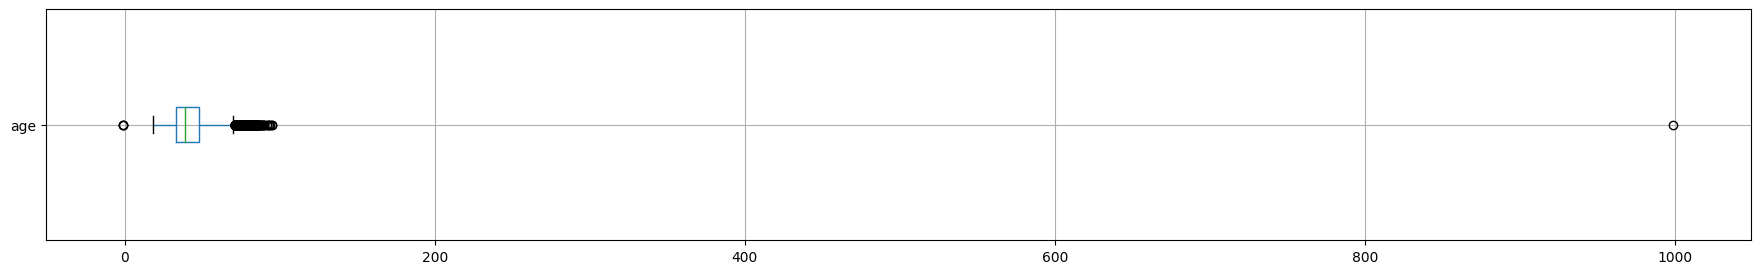

In [113]:
# creating a box sub plot to see plot in numerical form
# code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(predic_f, columns=['age'])
temp_df.boxplot(vert=False)
# Plot shows that 99% of entry are between (0-<200), and 1 towards 1000

In [114]:
#using for loop to iterate the values in age and setting the lowest age at 18years old and higest 120 yeals old
for x in predic_f.index:
  if predic_f.loc[x, "age"] > 120:
    predic_f.loc[x, "age"] = 120
  if predic_f.loc[x, "age"] <= 18:
    predic_f.loc[x, "age"] = 18

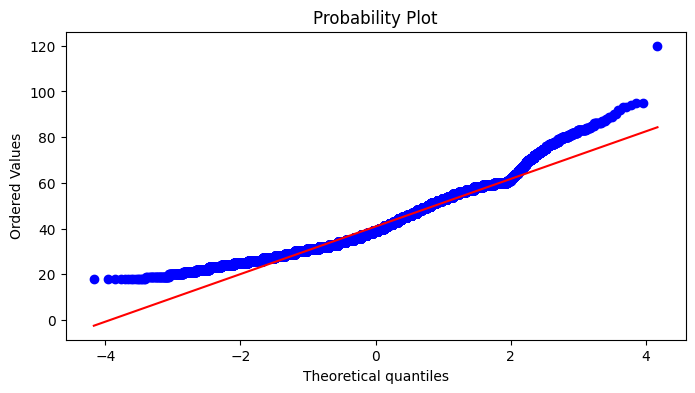

In [115]:
#Checking result visually
# code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (8, 4)
stats.probplot(predic_f["age"], dist="norm", plot=plt)
plt.show()


In [117]:
for x in predic_f.index:
  if predic_f.loc[x,"age"] >= 120:
    predic_f.drop(x, inplace = True)
  if predic_f.loc[x, "age"] <= 18:
    predic_f.loc[x, "age"] = 18



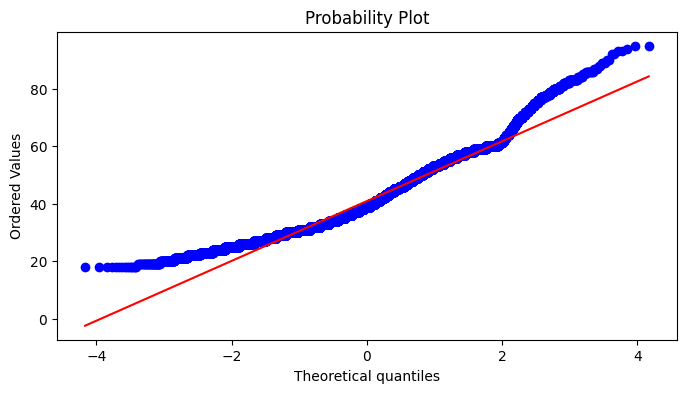

In [118]:
#Checking result visually
plt.rcParams["figure.figsize"] = (8, 4)
stats.probplot(predic_f["age"], dist="norm", plot=plt)
plt.show()

We've removed the unrealistic values in age column using for loop. setting customers age to 18-199 years old inclusive.

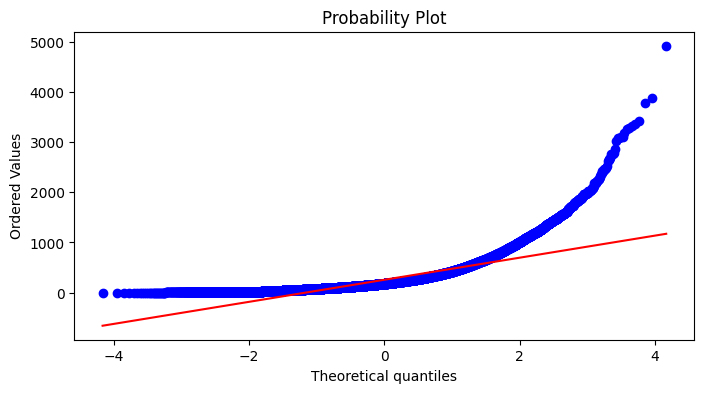

In [119]:
#Plotting duration column 
plt.rcParams["figure.figsize"] = (8, 4)
stats.probplot(predic_f["duration"], dist="norm", plot=plt)
plt.show()

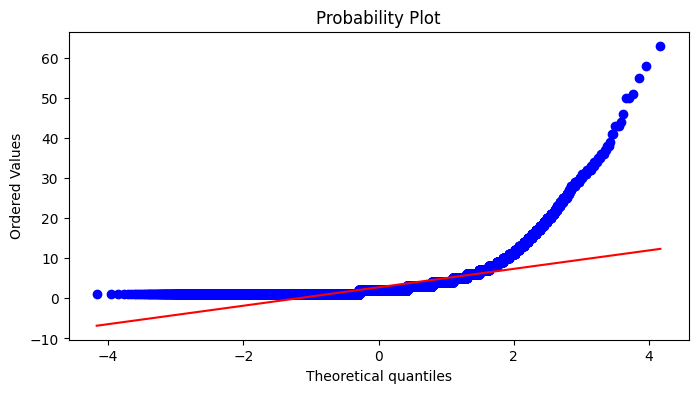

In [120]:
#Plotting campaingn column
plt.rcParams["figure.figsize"] = (8,4)
stats.probplot(predic_f['campaign'], dist ="norm", plot = plt)
plt.show()

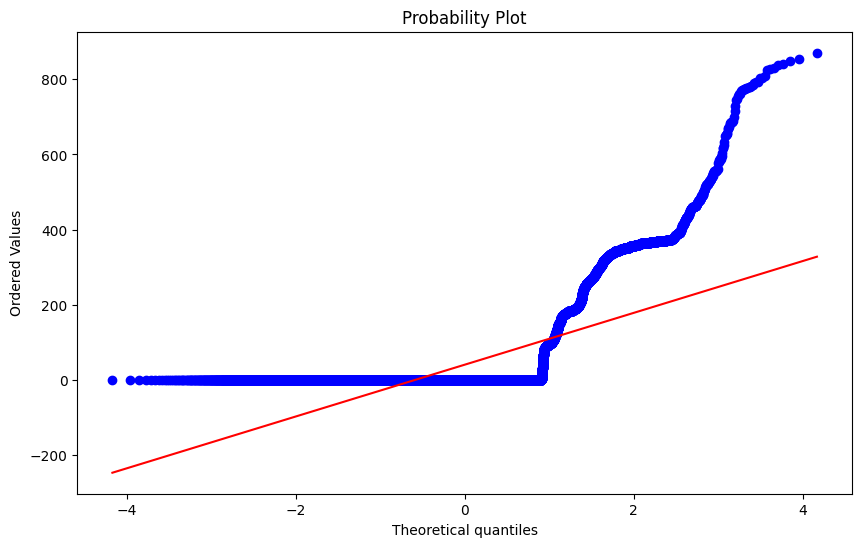

In [121]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(predic_f['pdays'], dist ="norm", plot = plt)
plt.show()

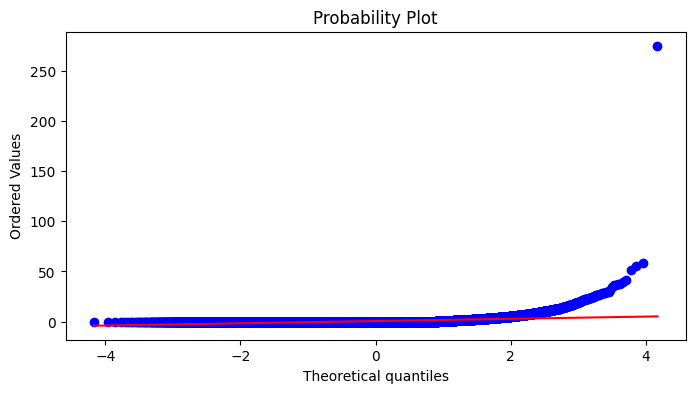

In [122]:
plt.rcParams["figure.figsize"] = (8,4)
stats.probplot(predic_f['previous'], dist ="norm", plot = plt)
plt.show()

In [123]:
for x in predic_f.index:
  if predic_f.loc[x,"previous"] > 55:
    predic_f.drop(x, inplace = True)

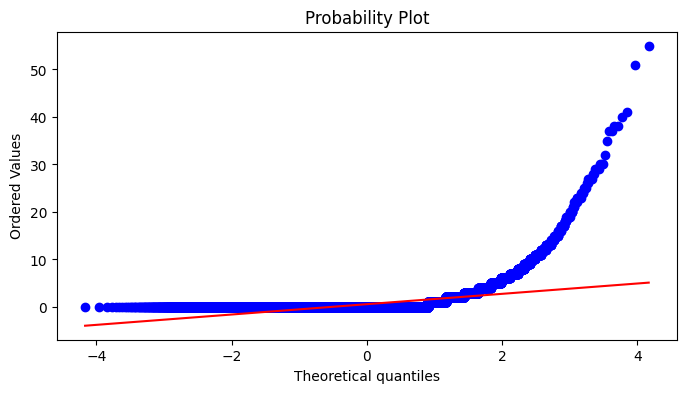

In [124]:
plt.rcParams["figure.figsize"] = (8,4)
stats.probplot(predic_f['previous'], dist ="norm", plot = plt)
plt.show()

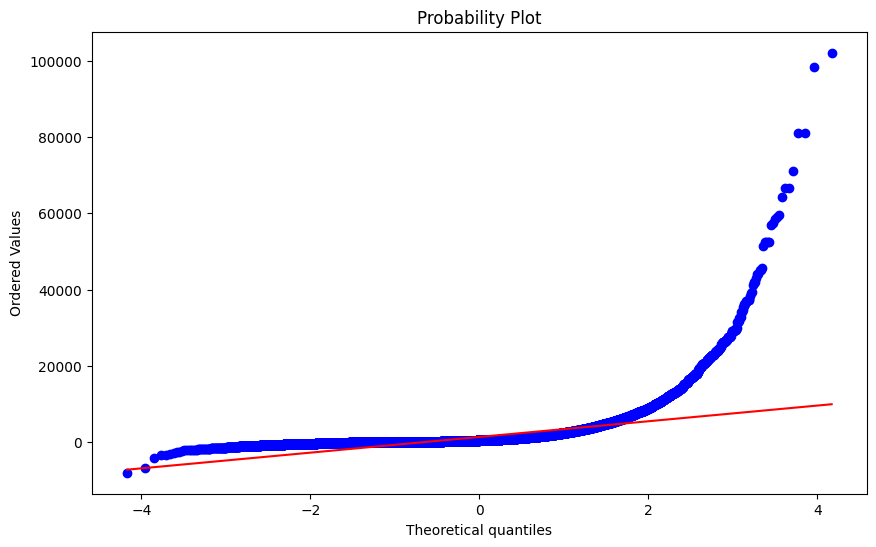

In [125]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(predic_f['balance'], dist ="norm", plot = plt)
plt.show()

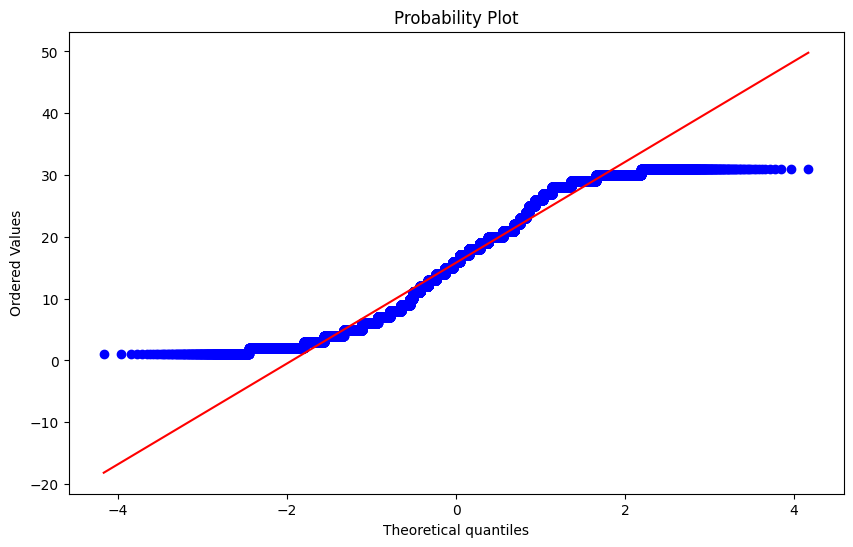

In [126]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(predic_f["day"], dist="norm", plot=plt)
plt.show()

In [127]:
new_numerical = predic_f.select_dtypes(include="number") # assign numerical columns to varialble 'numerical_data' 
new_numerical

,Id,age,balance,day,duration,campaign,pdays,previous
45205,46206,18.0,505.0,17,386,2,-1,0
45203,46204,18.0,113.0,17,266,1,-1,0
45204,46205,18.0,2850.0,17,300,1,40,8
40887,41888,18.0,608.0,12,267,1,-1,0
41222,42223,18.0,35.0,21,104,2,-1,0
...,...,...,...,...,...,...,...,...
44262,45263,93.0,775.0,22,860,2,177,7
44420,45421,93.0,775.0,4,476,2,13,9
31233,32234,94.0,1234.0,3,212,1,-1,0
33699,34700,95.0,2282.0,21,207,17,-1,0


In [128]:
# reset 'new_numerical' dataframe indexing.  
new_numerical.reset_index(drop=True)

,Id,age,balance,day,duration,campaign,pdays,previous
0,46206,18.0,505.0,17,386,2,-1,0
1,46204,18.0,113.0,17,266,1,-1,0
2,46205,18.0,2850.0,17,300,1,40,8
3,41888,18.0,608.0,12,267,1,-1,0
4,42223,18.0,35.0,21,104,2,-1,0
...,...,...,...,...,...,...,...,...
45200,45263,93.0,775.0,22,860,2,177,7
45201,45421,93.0,775.0,4,476,2,13,9
45202,32234,94.0,1234.0,3,212,1,-1,0
45203,34700,95.0,2282.0,21,207,17,-1,0


In [175]:
#Trail 2
categorical_data1 = predic_f.select_dtypes(exclude="number")
categorical_data1

,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
43637,student,single,unknown,no,no,no,cellular,may,unknown,yes
41252,student,single,secondary,no,no,no,cellular,aug,unknown,no
41487,student,single,unknown,no,no,no,cellular,sep,unknown,yes
42146,student,single,secondary,no,no,no,cellular,nov,other,no
...,...,...,...,...,...,...,...,...,...,...
44262,retired,married,unknown,no,no,no,cellular,jul,success,yes
44420,retired,married,unknown,no,no,no,cellular,aug,success,yes
31233,retired,divorced,secondary,no,no,no,cellular,mar,unknown,no
33699,retired,divorced,primary,no,no,no,telephone,apr,unknown,yes


In [176]:
#trail4
all_merge2 = pd.merge(new_numerical,categorical_data1, left_index=True, right_index=True)
all_merge2.head()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
45203,46204,18.0,113.0,17,266,1,-1,0,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
45204,46205,18.0,2850.0,17,300,1,40,8,retired,married,secondary,no,no,no,cellular,nov,failure,yes
40887,41888,18.0,608.0,12,267,1,-1,0,student,single,primary,no,no,no,cellular,aug,unknown,yes
41222,42223,18.0,35.0,21,104,2,-1,0,student,single,unknown,no,no,no,telephone,aug,unknown,no


In [177]:
all_merge2.reset_index(drop=True)

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,46206,18.0,505.0,17,386,2,-1,0,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
1,46204,18.0,113.0,17,266,1,-1,0,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
2,46205,18.0,2850.0,17,300,1,40,8,retired,married,secondary,no,no,no,cellular,nov,failure,yes
3,41888,18.0,608.0,12,267,1,-1,0,student,single,primary,no,no,no,cellular,aug,unknown,yes
4,42223,18.0,35.0,21,104,2,-1,0,student,single,unknown,no,no,no,telephone,aug,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,45263,93.0,775.0,22,860,2,177,7,retired,married,unknown,no,no,no,cellular,jul,success,yes
45201,45421,93.0,775.0,4,476,2,13,9,retired,married,unknown,no,no,no,cellular,aug,success,yes
45202,32234,94.0,1234.0,3,212,1,-1,0,retired,divorced,secondary,no,no,no,cellular,mar,unknown,no
45203,34700,95.0,2282.0,21,207,17,-1,0,retired,divorced,primary,no,no,no,telephone,apr,unknown,yes


In [129]:
new_numerical.corr()

,Id,age,balance,day,duration,campaign,pdays,previous
Id,1.000000,0.014784,0.073624,-0.061658,0.012960,-0.102980,0.437699,0.328205
age,0.014784,1.000000,0.097733,-0.009099,-0.004740,0.004857,-0.023768,0.001102
balance,0.073624,0.097733,1.000000,0.004469,0.021558,-0.014591,0.003448,0.021256
day,-0.061658,-0.009099,0.004469,1.000000,-0.030227,0.162435,-0.093029,-0.057710
duration,0.012960,-0.004740,0.021558,-0.030227,1.000000,-0.084580,-0.001664,-0.000365
campaign,-0.102980,0.004857,-0.014591,0.162435,-0.084580,1.000000,-0.088636,-0.039128
pdays,0.437699,-0.023768,0.003448,-0.093029,-0.001664,-0.088636,1.000000,0.545559
previous,0.328205,0.001102,0.021256,-0.057710,-0.000365,-0.039128,0.545559,1.000000


# CONVERTING CATEGORICAL DATA INTO NUMERICAL

con't with converting categorical column to numerical


In [130]:
#Getting dataframe of non numerical data and assigning to variable 'categorical_data' 
categorical_data = predic_f.select_dtypes(exclude="number")
categorical_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,technician,single,secondary,no,no,yes,cellular,nov,unknown,yes
45203,student,single,tertiary,no,no,no,cellular,nov,unknown,yes
45204,retired,married,secondary,no,no,no,cellular,nov,failure,yes
40887,student,single,primary,no,no,no,cellular,aug,unknown,yes
41222,student,single,unknown,no,no,no,telephone,aug,unknown,no
...,...,...,...,...,...,...,...,...,...,...
44262,retired,married,unknown,no,no,no,cellular,jul,success,yes
44420,retired,married,unknown,no,no,no,cellular,aug,success,yes
31233,retired,divorced,secondary,no,no,no,cellular,mar,unknown,no
33699,retired,divorced,primary,no,no,no,telephone,apr,unknown,yes


In [131]:
# code by: HASSAN , M. (2022)
encoder = LabelEncoder() # Assigning variable encoder to lableEncoder()
categorical_data['job'] = encoder.fit_transform(categorical_data['job']) # assigns a numerical value to each unique value in 'job column'
job = {index : label for index, label in enumerate(encoder.classes_)} # code replaces the original job titles with their corresponding numerical labels.
job # return the dict

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [132]:
categorical_data['marital'] = encoder.fit_transform(categorical_data['marital'])
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

{0: 'divorced', 1: 'married', 2: 'single'}

In [133]:
categorical_data['education'] = encoder.fit_transform(categorical_data['education'])
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

In [134]:
categorical_data['default'] = encoder.fit_transform(categorical_data['default'])
default = {index : label for index, label in enumerate(encoder.classes_)}
default

{0: 'no', 1: 'yes'}

In [135]:
categorical_data['housing'] = encoder.fit_transform(categorical_data['housing'])
housing = {index : label for index, label in enumerate(encoder.classes_)}
housing

{0: 'no', 1: 'yes'}

In [136]:
categorical_data['loan'] = encoder.fit_transform(categorical_data['loan'])
loan = {index : label for index, label in enumerate(encoder.classes_)}
loan

{0: 'no', 1: 'yes'}

In [137]:
categorical_data['contact']=encoder.fit_transform(categorical_data['contact'])
contact={index : label for index,label in enumerate(encoder.classes_)}
contact

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

In [138]:
categorical_data['month'] = encoder.fit_transform(categorical_data['month'])
month = {index : label for index, label in enumerate(encoder.classes_)}
month

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

In [139]:
categorical_data['poutcome'] = encoder.fit_transform(categorical_data['poutcome'])
poutcome = {index : label for index, label in enumerate(encoder.classes_)}
poutcome

{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

In [140]:
categorical_data['y'] = encoder.fit_transform(categorical_data['y'])
y = {index : label for index, label in enumerate(encoder.classes_)}
y

{0: 'no', 1: 'yes'}

In [141]:
# assining the transformed 'categorical_data' to new variable 'new_categorical'
new_categorical = categorical_data # This return a new dataframe containg numerical values as 'keys:' representing str values depending on the column  
new_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,9,2,1,0,0,1,0,9,3,1
45203,8,2,2,0,0,0,0,9,3,1
45204,5,1,1,0,0,0,0,9,0,1
40887,8,2,0,0,0,0,0,1,3,1
41222,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
44262,5,1,3,0,0,0,0,5,2,1
44420,5,1,3,0,0,0,0,1,2,1
31233,5,0,1,0,0,0,0,7,3,0
33699,5,0,0,0,0,0,1,0,3,1


In [142]:
# checking mising values
new_categorical.isnull().sum()
#No missing value!

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [143]:
#Indexing
new_categorical.reset_index(drop=True)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,9,2,1,0,0,1,0,9,3,1
1,8,2,2,0,0,0,0,9,3,1
2,5,1,1,0,0,0,0,9,0,1
3,8,2,0,0,0,0,0,1,3,1
4,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
45200,5,1,3,0,0,0,0,5,2,1
45201,5,1,3,0,0,0,0,1,2,1
45202,5,0,1,0,0,0,0,7,3,0
45203,5,0,0,0,0,0,1,0,3,1


Ayo creat a code that: 
return list of the nun numverical dictonaries above
assign list of dic to variable 'new cataegorical'
pd.read(new_categorical) 
nb: this should print a new dataframe containing the 

# Data Merging 

In [144]:
# We are 'fully' merging new_numerical and new_categorical dataframes together using their 'index' as the key
all_merge = pd.merge(new_numerical,new_categorical, left_index=True, right_index=True)
all_merge.head()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
45203,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
45204,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
40887,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
41222,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0


In [145]:
#Ressing the index for the new joined dataframe 
all_merge.reset_index(drop=True)

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
1,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
2,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
3,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
4,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,45263,93.0,775.0,22,860,2,177,7,5,1,3,0,0,0,0,5,2,1
45201,45421,93.0,775.0,4,476,2,13,9,5,1,3,0,0,0,0,1,2,1
45202,32234,94.0,1234.0,3,212,1,-1,0,5,0,1,0,0,0,0,7,3,0
45203,34700,95.0,2282.0,21,207,17,-1,0,5,0,0,0,0,0,1,0,3,1


In [146]:
#Trying the join syntax
new_numerical.join(new_categorical) 

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45205,46206,18.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
45203,46204,18.0,113.0,17,266,1,-1,0,8,2,2,0,0,0,0,9,3,1
45204,46205,18.0,2850.0,17,300,1,40,8,5,1,1,0,0,0,0,9,0,1
40887,41888,18.0,608.0,12,267,1,-1,0,8,2,0,0,0,0,0,1,3,1
41222,42223,18.0,35.0,21,104,2,-1,0,8,2,3,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,45263,93.0,775.0,22,860,2,177,7,5,1,3,0,0,0,0,5,2,1
44420,45421,93.0,775.0,4,476,2,13,9,5,1,3,0,0,0,0,1,2,1
31233,32234,94.0,1234.0,3,212,1,-1,0,5,0,1,0,0,0,0,7,3,0
33699,34700,95.0,2282.0,21,207,17,-1,0,5,0,0,0,0,0,1,0,3,1


In [147]:
# Checking to see all default values were returned, because am seeing only 0s
all_merge.groupby("default").size()
# we have more "no defaulters" than "yes defaulters"

default
0    44391
1      814
dtype: int64

In [148]:
# Check for missing value in our merged dataframe
all_merge.isnull().sum()

Id           0
age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [149]:
# checking for duplicates
dup_after_merge = all_merge.duplicated().value_counts() 
print(dup_after_merge) 

False    45205
dtype: int64


for data  correlation and visualization
Check is there a correlation between (defaulters & job)/ (balance & y), (marital & default & y), (age & y)

# **Data correlation**

In [150]:
all_merge.corr()

,Id,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
Id,1.000000,0.014784,0.073624,-0.061658,0.012960,-0.102980,0.437699,0.328205,0.063073,0.081767,0.094718,-0.052866,-0.176076,-0.084381,-0.722298,-0.161973,-0.445333,0.296234
age,0.014784,1.000000,0.097733,-0.009099,-0.004740,0.004857,-0.023768,0.001102,-0.021898,-0.403225,-0.106746,-0.017884,-0.185438,-0.015534,0.026280,-0.042564,0.007652,0.024759
balance,0.073624,0.097733,1.000000,0.004469,0.021558,-0.014591,0.003448,0.021256,0.018233,0.002108,0.064511,-0.066715,-0.068748,-0.084363,-0.027253,0.019790,-0.020973,0.052840
day,-0.061658,-0.009099,0.004469,1.000000,-0.030227,0.162435,-0.093029,-0.057710,0.022876,-0.005305,0.022714,0.009626,-0.027849,0.011311,-0.027796,-0.005963,0.083464,-0.028403
duration,0.012960,-0.004740,0.021558,-0.030227,1.000000,-0.084580,-0.001664,-0.000365,0.004804,0.011901,0.001919,-0.010106,0.005071,-0.012473,-0.020783,0.006322,0.010986,0.394500
campaign,-0.102980,0.004857,-0.014591,0.162435,-0.084580,1.000000,-0.088636,-0.039128,0.006843,-0.009012,0.006254,0.016918,-0.023546,0.009969,0.019685,-0.109996,0.101601,-0.073185
pdays,0.437699,-0.023768,0.003448,-0.093029,-0.001664,-0.088636,1.000000,0.545559,-0.024377,0.019199,0.000116,-0.029923,0.124133,-0.022912,-0.244746,0.033086,-0.858360,0.103463
previous,0.328205,0.001102,0.021256,-0.057710,-0.000365,-0.039128,0.545559,1.000000,-0.000085,0.019327,0.019201,-0.021794,0.041770,-0.013617,-0.177479,0.029884,-0.591197,0.113033
job,0.063073,-0.021898,0.018233,0.022876,0.004804,0.006843,-0.024377,-0.000085,1.000000,0.061972,0.166730,-0.006740,-0.125368,-0.032949,-0.082121,-0.092876,0.010964,0.040511
marital,0.081767,-0.403225,0.002108,-0.005305,0.011901,-0.009012,0.019199,0.019327,0.061972,1.000000,0.108639,-0.006714,-0.016065,-0.046898,-0.039180,-0.006971,-0.016861,0.045600



# Analysing Data

Data visulaisation

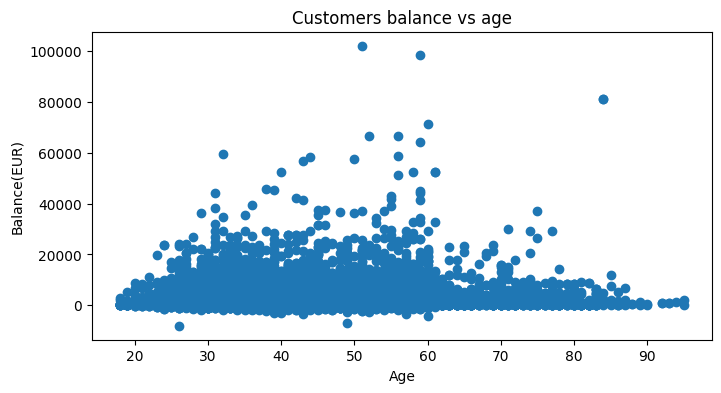

In [192]:
plt.figure(figsize=(8,4))
plt.scatter(all_merge['age'],all_merge['balance'])
#plt.plot(austin['DATE'],austin['MLY-CLDD-BASE50'])

plt.xlabel('Age')
plt.ylabel('Balance(EUR)')
plt.title('Customers balance vs age') 
plt.show()
#all_merge.plot(kind = 'scatter', x = 'age', y = 'balance')
#plt.show()
# Insight: Mojority of the customers age(18_ 120)years have their account balance between (0-20,000) euros

Text(0.5, 1.0, 'yes vs balance and age')

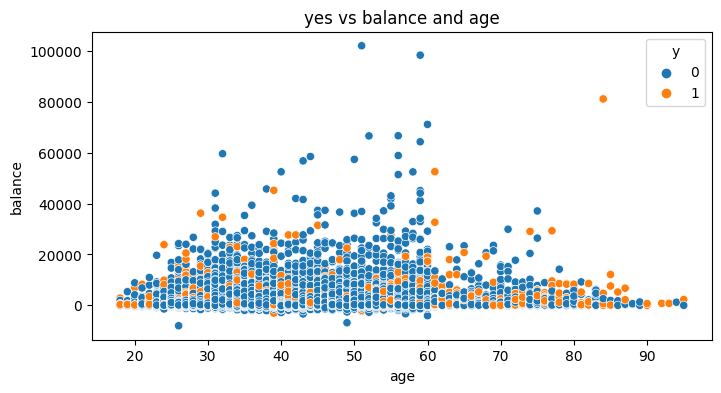

In [191]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='age',y='balance', data=all_merge, hue='y')
plt.title('yes vs balance and age')
#insight: people with balance of (0-20,000) bought services more than others, which this balance have people from all employment background represented according to the 'balancevsemployment' plot
#sns.scatterplot(x='Height',y='Weight', data=summer2016, hue='Medal', size='Age')

Text(0.5, 1.0, 'Defaulters')

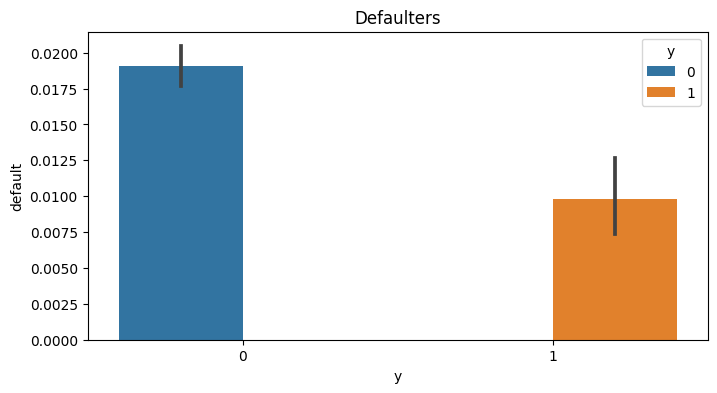

In [193]:
plt.figure(figsize=(8,4))
sns.barplot(x='y',y='default', data=all_merge, hue='y')
plt.title('Defaulters')
#insight: the higher the default the lower the chance of buying because 0.0200 is lower that 0.00 (less defalute more chance of buying)

<ipython-input-194-367744fbde2a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_merge2.groupby('y').mean()['balance'].plot(kind='bar')


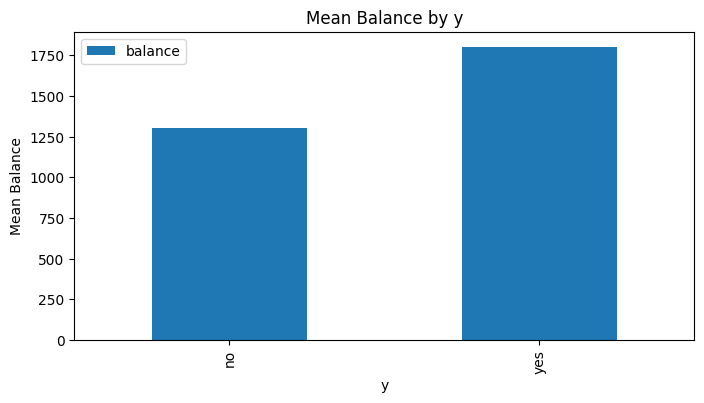

In [194]:
#sns.barplot(data=all_merge, y='y', x='balance')
#all_merge.groupby('y').mean()['balance'].plot.bar()
plt.figure(figsize=(8,4))
all_merge2.groupby('y').mean()['balance'].plot(kind='bar')
plt.xlabel('y')
plt.ylabel('Mean Balance')
plt.title('Mean Balance by y')
plt.legend()
plt.show()
# mean of banlance improves the chances of buying, averagely the more customer, the more chances of selling significant number of services, and the lower the no

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=all_merge, x='job', y='balance')

plt.title("Employment vs balance", size="xx-large")
plt.xlabel("Employment" ,size="x-large")
plt.ylabel("Balance" ,size="x-large")

Text(0, 0.5, 'Balance')

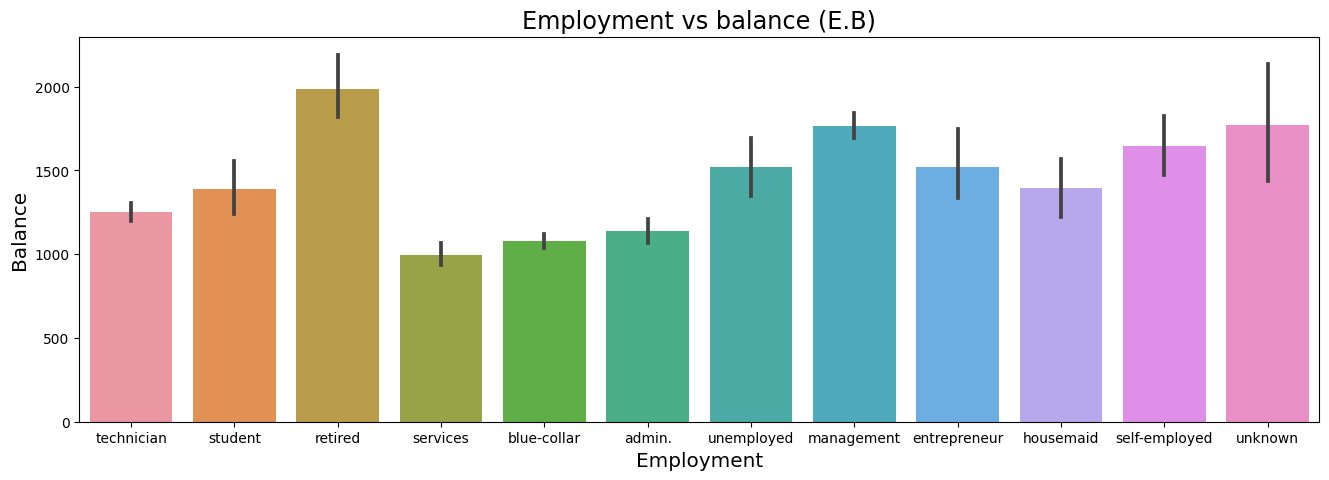

In [201]:
plt.figure(figsize=(16,5))
sns.barplot(data=all_merge2, x='job', y='balance')

plt.title("Employment vs balance (E.B)", size="xx-large")
plt.xlabel("Employment" ,size="x-large")
plt.ylabel("Balance" ,size="x-large")
#Retired people have the higest balance and service eployees have the lowest

Text(0, 0.5, 'Balance')

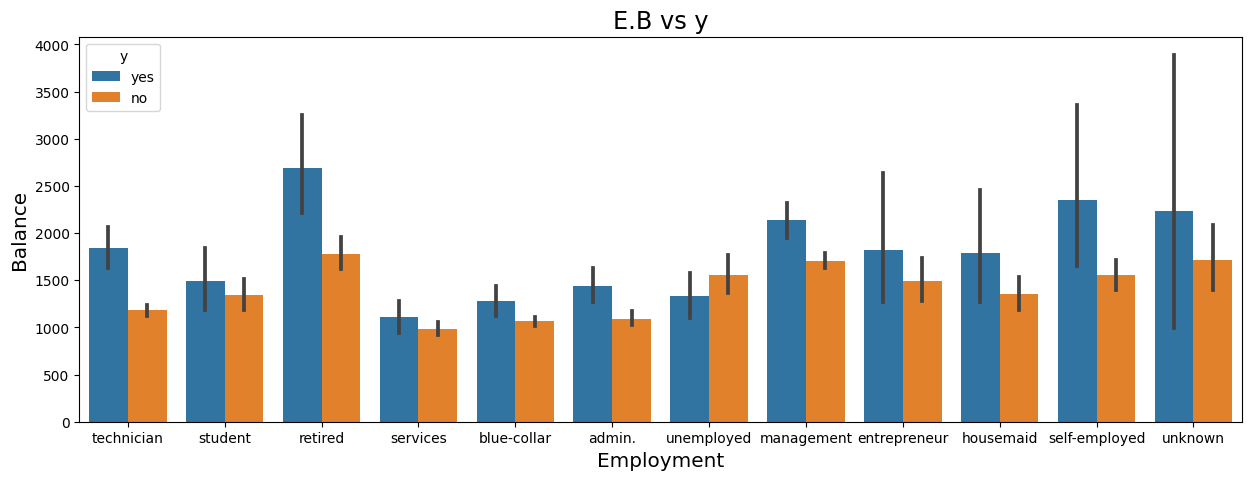

In [202]:
plt.figure(figsize=(15,5))
sns.barplot(data=all_merge2, x='job', y='balance', hue='y')

plt.title("E.B vs y", size="xx-large")
plt.xlabel("Employment" ,size="x-large")
plt.ylabel("Balance" ,size="x-large")
#across all employment, more people has boght the services that those that haven't

##Using online Api

In [165]:
#Check if Api is good
data_search = requests.get('http://api.open-notify.org/astros.json')
data_search

<Response [200]>

In [166]:
#get information from api
people_IS= requests.get('http://api.open-notify.org/astros.json')
people_IS.json()

{'message': 'success',
 'number': 10,
 'people': [{'craft': 'ISS', 'name': 'Sergey Prokopyev'},
  {'craft': 'ISS', 'name': 'Dmitry Petelin'},
  {'craft': 'ISS', 'name': 'Frank Rubio'},
  {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'},
  {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'},
  {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'},
  {'craft': 'ISS', 'name': 'Stephen Bowen'},
  {'craft': 'ISS', 'name': 'Warren Hoburg'},
  {'craft': 'ISS', 'name': 'Sultan Alneyadi'},
  {'craft': 'ISS', 'name': 'Andrey Fedyaev'}]}

In [167]:
# api infor to data frame
space_ppl= pd.DataFrame(people_IS.json())
space_ppl

,message,number,people
0,success,10,"{'craft': 'ISS', 'name': 'Sergey Prokopyev'}"
1,success,10,"{'craft': 'ISS', 'name': 'Dmitry Petelin'}"
2,success,10,"{'craft': 'ISS', 'name': 'Frank Rubio'}"
3,success,10,"{'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}"
4,success,10,"{'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}"
5,success,10,"{'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}"
6,success,10,"{'craft': 'ISS', 'name': 'Stephen Bowen'}"
7,success,10,"{'craft': 'ISS', 'name': 'Warren Hoburg'}"
8,success,10,"{'craft': 'ISS', 'name': 'Sultan Alneyadi'}"
9,success,10,"{'craft': 'ISS', 'name': 'Andrey Fedyaev'}"
